# 13 Modeling for ROI


## 13.01 Imports


### 13.01.01 Python Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

### 13.01.02 Feature Film Import


Read in Data

In [25]:
df = pd.read_csv('../Bens_Data/Disney_Films_For_Visual.csv')
df.drop(columns=['Unnamed: 0','index'], inplace=True)

### 13.02 Determine and Create Features List

In [26]:
df.columns

Index(['DFL_title', 'tconst', 'titleType', 'primaryTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'newurl',
       'mpaarating', 'rlsdt', 'budget', 'worldwide', 'DIR_COUNT', 'DIR_AGE',
       'DIR_RTG', 'DIR_FILM_COUNT', 'WTR_COUNT', 'WTR_AGE', 'WTR_FILM_COUNT',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fi', 'history', 'horror',
       'music', 'musical', 'mystery', 'news', 'romance', 'sci', 'sport',
       'thriller', 'western', 'newmpaarating_G', 'newmpaarating_Not Rated',
       'newmpaarating_PG', 'newmpaarating_PG-13', 'budget_adj',
       'worldwide_adj', 'ROI', 'rlsdt_dt', 'rlsdt_mo', 'rlsdt_day',
       'rlsdt_daynm', 'rlsdt_dayofwk', 'rlsdt_season', 'rlsdt_season_NM'],
      dtype='object')

In [27]:
features = [ 'startYear',
       'runtimeMinutes', 
        #'averageRating', 
        #'numVotes', 
       'DIR_COUNT', 'DIR_AGE',
       'DIR_RTG', 'DIR_FILM_COUNT', 'WTR_COUNT', 'WTR_AGE', 
       'WTR_FILM_COUNT','action', 'adventure', 'animation', 
       'biography', 'comedy', 'crime','documentary', 'drama', 
       'family', 'fantasy', 'fi', 'history', 'horror','music', 
       'musical', 'mystery', 'news', 'romance', 'sci', 'sport',
       'thriller', 'western', 'newmpaarating_G', 'newmpaarating_Not Rated',
       'newmpaarating_PG', 'newmpaarating_PG-13', 'budget_adj',
       #'worldwide_adj', 
       #'ROI', 
       'rlsdt_mo', 'rlsdt_day',
       'rlsdt_dayofwk', 'rlsdt_season']

In [28]:
df.head()

,DFL_title,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,newurl,...,budget_adj,worldwide_adj,ROI,rlsdt_dt,rlsdt_mo,rlsdt_day,rlsdt_daynm,rlsdt_dayofwk,rlsdt_season,rlsdt_season_NM
0,101 Dalmatians,tt0115433,movie,101 Dalmatians,1996,103,"Adventure,Comedy,Crime",5.7,109712.0,https://www.imdb.com/title/tt0115433,...,75000000,320689294,3.275857,1996-11-27,11.0,27.0,Wednesday,4.0,3.0,Fall
1,102 Dalmatians,tt0211181,movie,102 Dalmatians,2000,100,"Adventure,Comedy,Family",4.8,37056.0,https://www.imdb.com/title/tt0211181,...,85000000,183611771,1.160138,2000-11-22,11.0,22.0,Wednesday,4.0,3.0,Fall
2,"20,000 Leagues Under the Sea",tt0046672,movie,"20,000 Leagues Under the Sea",1954,127,"Adventure,Drama,Family",7.2,33109.0,https://www.imdb.com/title/tt0046672,...,9000000,0,-1.000000,1955-07-20,7.0,20.0,Wednesday,4.0,2.0,Summer
3,A Bug's Life,tt0120623,movie,A Bug's Life,1998,95,"Adventure,Animation,Comedy",7.2,284538.0,https://www.imdb.com/title/tt0120623,...,120000000,363258859,2.027157,1998-11-25,11.0,25.0,Wednesday,4.0,3.0,Fall
4,A Christmas Carol,tt1067106,movie,A Christmas Carol,2009,96,"Adventure,Animation,Comedy",6.8,112582.0,https://www.imdb.com/title/tt1067106,...,200000000,325286646,0.626433,2009-11-06,11.0,6.0,Friday,6.0,3.0,Fall


### 13.03 Null Model


In [29]:
df['ROI'].isnull().sum()

174

In [30]:
df['ROI'].mean(), df['ROI'].min(), df['ROI'].max()

(3.4220782381303145, -1.0, 122.36590126751167)

In [31]:
df.shape

(431, 57)

In [32]:
df = df[df['ROI'].notnull()]
df.shape

(257, 57)

<AxesSubplot:>

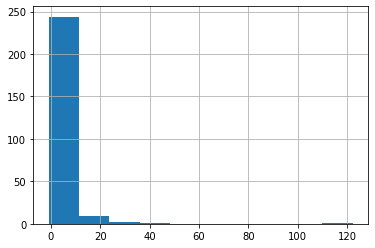

In [33]:
df['ROI'].hist()

In [34]:
df['base'] = df['ROI'].mean()
RMSE = np.sqrt(metrics.mean_squared_error(df['ROI'], df['base']))
RMSE

9.146536077257574

The Baseline model has a Root Mean Squared Error of 9.14%. On average the predicted IMDB Rating is about 9.14% off from the true average rating.

### 13.04 Pipeline

In [35]:
X = df[features]
y = df['ROI']

In [36]:
def modelfunc(X, y):
    pipelines = [
        ('LINEAR REGRESSION', (Pipeline([ ('LR', LinearRegression())]))),
        ('DECISION TREE', (Pipeline([ ('TREE', DecisionTreeRegressor())]))),
        ('BAGGED TREE', (Pipeline([ ('BAG', BaggingRegressor())]))),
        ('RANDOM FOREST', (Pipeline([ ('RAND', RandomForestRegressor())]))),
        ('ADABOOST', (Pipeline([ ('ADA', AdaBoostRegressor())]))),
        ('KNN', (Pipeline([ ('sc', StandardScaler()),('KNN', KNeighborsRegressor())]))),
        ('LASSO',(Pipeline([ ('sc', StandardScaler()),('LASSO', LassoCV())]))),
        ('RIDGE',(Pipeline([ ('sc', StandardScaler()),('RIDGE', RidgeCV())])))
    ]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 
    for pipe_name ,model in pipelines:
        print(pipe_name)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        trainscore = model.score(X_train, y_train)
        testscore = model.score(X_test, y_test)
        crossval = cross_val_score(model, X_train, y_train).mean()
        rmsetr= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmsete = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        print (f'Model = {model}')
        print (f'Train Score = {trainscore}')
        print (f'Test Score = {testscore}')
        print (f'Cross Val Score = {crossval}')
        print (f'RMSE Train = {rmsetr}')
        print (f'RMSE Test = {rmsete}')
        print('')
        print('')

In [37]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.4050960303179505
Test Score = -0.2158192480975447
Cross Val Score = -5.408454302840425
RMSE Train = 7.541058901157588
RMSE Test = 7.6115938677866355


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = -0.48623422682745465
Cross Val Score = -5.016188852991029
RMSE Train = 0.0
RMSE Test = 8.415593113132118


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.7536706663129974
Test Score = 0.047170478831189744
Cross Val Score = -4.174920167212475
RMSE Train = 4.852515882821549
RMSE Test = 6.738274552059963


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.8807726285864695
Test Score = -0.7016505630851413
Cross Val Score = -1.6972628843317974
RMSE Train = 3.3759568274581038
RMSE Test = 9.004846024829757


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBoostRegressor())])
Train Score

With negative crossval scores across the board, we're not going to pursue this any further.  In reality, ROI is a function of Budget and Worldwide Revenue.  If we can find or estimate a film's budget, and then we use the previous model to predict Wordlwide Revenue, then we can predict ROI as well.